# Lendo dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('winequality.csv', sep=';', decimal='.')

In [3]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
len(df)

6497

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.describe(percentiles=[0, 0.25, 0.5, 0.75, 0.95, 0.99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
0%,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
95%,9.800000,0.670000,0.560000,15.000000,0.102000,61.000000,206.000000,0.999392,3.500000,0.790000,7.000000
99%,12.000000,0.880000,0.740000,18.200000,0.186160,77.000000,238.000000,10.008000,3.640000,0.990000,8.000000


In [7]:
df = df[df['alcohol'].str.count("\.")<=1]
df['alcohol'] = df['alcohol'].astype('float32')

Podemos observar que apenas a variável type não é contínua e que não há nenhum missing values no conjunto de dados. Porém, aparentemente há alguns outlier que precisam ser tratados. Por exemplo, na variável densidade 99% dos dados tem valores até 10, mas vemos um máximo de 103. Além disso, a variável alcohol estava com alguns valores na casa dos quadrilhões, provavelmente algum erro na conversão dos dados.

In [8]:
df = pd.get_dummies(df, columns=['type'])
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_Red', 'type_White'],
      dtype='object')

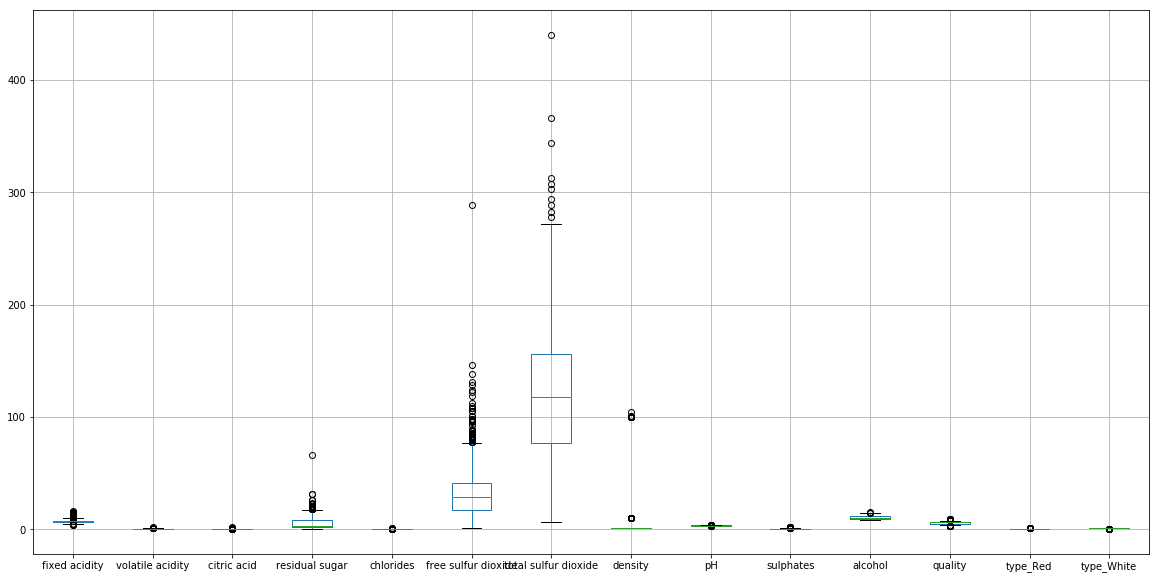

In [9]:
plt.figure(figsize=[20,10])
df.boxplot()

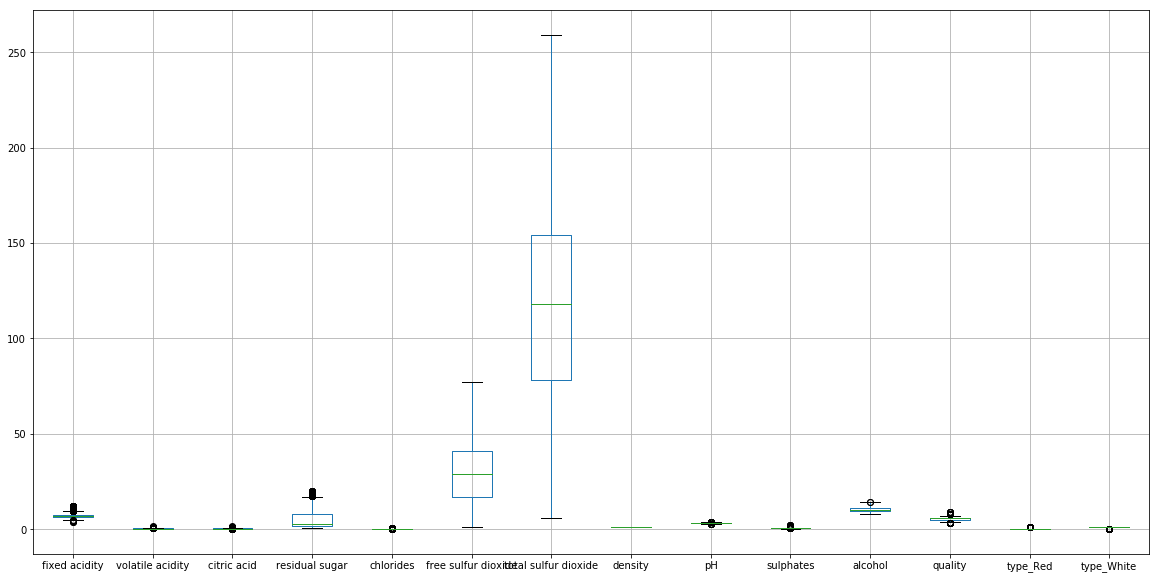

In [10]:
plt.figure(figsize=[20,10])
df2 = df[(df['free sulfur dioxide']<= 77) & (df['total sulfur dioxide']<=270) & (df['density']<=10) & (df['residual sugar'] <=20) & (df['fixed acidity']<=12)]
df2.boxplot()

In [11]:
print(len(df))
print(len(df2))
print((len(df)-len(df2))/len(df)*100)

6457
6213
3.7788446647049714


Foram limpos 3.7% dos dados devido a outliers

In [12]:
df = df2
del df2

# Testando correlações

In [13]:
quality_corr = df.corr()['quality']
print(quality_corr)

fixed acidity          -0.081722
volatile acidity       -0.268608
citric acid             0.087585
residual sugar         -0.030310
chlorides              -0.202697
free sulfur dioxide     0.079064
total sulfur dioxide   -0.031870
density                -0.324133
pH                      0.019471
sulphates               0.029666
alcohol                 0.451223
quality                 1.000000
type_Red               -0.125017
type_White              0.125017
Name: quality, dtype: float64


Analisando pelos valores de correção podemos observar que a variável mais positivamente correlacionada é a variável alcohol, com 0.45. Já as variáveis 'Density','Volatilidade da acidez' e 'Cloretos' são mais correlacionadas de forma inversa, ou seja, quanto maiores esse valores menor a qualidade do vinho. Também podemos perceber que vinho vermelho tem qualidades menores que vinho branco. 

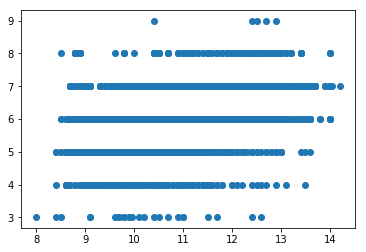

In [14]:
plt.scatter(df['alcohol'], df['quality'])

In [15]:
pd.crosstab([df['type_Red'], df['type_White']], df['quality'], normalize=True)

,quality,3,4,5,6,7,8,9
type_Red,type_White,,,,,,,
0,1,0.002414,0.025752,0.223403,0.341542,0.138419,0.027040,0.000805
1,0,0.001449,0.008209,0.103171,0.095606,0.029454,0.002736,0.000000


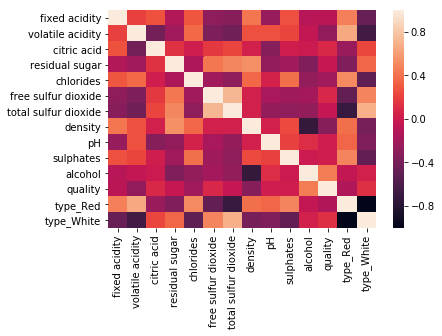

In [16]:
ax = sns.heatmap(df.corr())

In [17]:
df.corr()['free sulfur dioxide']['total sulfur dioxide']

0.7247569135763229

Olhando o gráfico também podemos ver que as variáveis 'Dióxido de enxofre livre' e 'Dióxido de enxofre total' são altamente correlacionadas. Se houvessem muitas variáveis no conjunto de dados esse poderia ser um indicativo para a exclusão de uma dessas variáveis

# Realizando a modelagem

6    2716
5    2029
7    1043
4     211
8     185
3      24
9       5
Name: quality, dtype: int64

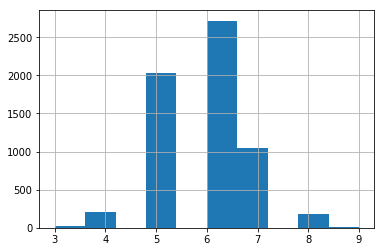

In [18]:
df['quality'].hist()
df['quality'].value_counts()

Por serem valores discretos, e não contínuos, uma possível abordagem seria criar um modelo multiclasse. Porém, por não ter exemplos de todas as classes (0 a 10), esse modelo seria falho. Neste caso a melhor alternativa será fazer uma regressão. 

Serão testados dois modelos muito utilizados para regressão, uma regressão linear e uma Random Forest Regressor.

### Testando a regressão linear

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
X = df.drop(columns=['quality'])
y = df['quality']
X = sm.add_constant(X)
print(X.head())

   const  fixed acidity  volatile acidity  citric acid  residual sugar  \
1    1.0            6.3              0.30         0.34             1.6   
2    1.0            8.1              0.28         0.40             6.9   
3    1.0            7.2              0.23         0.32             8.5   
4    1.0            7.2              0.23         0.32             8.5   
5    1.0            8.1              0.28         0.40             6.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   

   sulphates  alcohol  type_Red  type_White  
1       0.49      9.5         0           1  
2       0.44     1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [22]:
model_ls = sm.OLS(y_train,X_train)
model_ls = model_ls.fit()
model_ls.params

const                    89.538323
fixed acidity             0.121763
volatile acidity         -1.454831
citric acid              -0.154079
residual sugar            0.072545
chlorides                -0.460950
free sulfur dioxide       0.006390
total sulfur dioxide     -0.000917
density                -134.454302
pH                        0.643198
sulphates                 0.682810
alcohol                   0.204388
type_Red                 44.996282
type_White               44.542042
dtype: float64

No handles with labels found to put in legend.


Mean squared error: 0.53
Mean absolute error: 0.56
Variance score: 0.31
Erro maximo 3.03
Erro mediano 0.45
Porcentagens de erros menor que 1: 85.20 


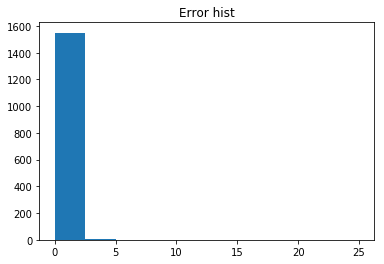

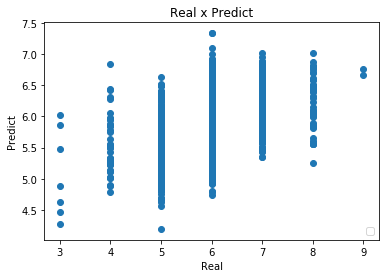

In [23]:
y_pred_ls = model_ls.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_ls))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred_ls))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_ls))
err_ls = abs(y_test - y_pred_ls)
plt.figure()
plt.hist(err_ls, range=[0,25])
plt.title('Error hist')
print('Erro maximo %.2f' % (max(err_ls)))
print('Erro mediano %.2f' %  (np.median(err_ls)))
print('Porcentagens de erros menor que 1: %.2f ' % (len(err_ls[err_ls<1])/len(err_ls)*100))
plt.figure()
plt.scatter(y_test, y_pred_ls)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('Real x Predict')
plt.legend(loc="lower right")

### Testando a Random Forest

In [24]:
del X_train['const']
del X_test['const']

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(n_estimators=350, random_state=0, n_jobs=-1, oob_score=True, max_features=7)
model = model.fit(X_train,y_train)

No handles with labels found to put in legend.


0.5210279459735272
Mean squared error: 0.36
Mean absolute error: 0.43
Variance score: 0.52
Erro maximo 2.97
Erro mediano 0.29
Porcentagens de erros menor que 1: 90.86 


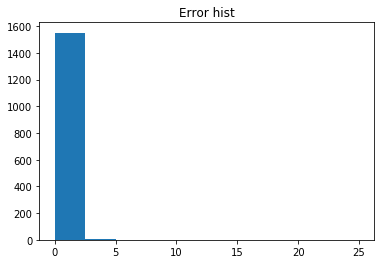

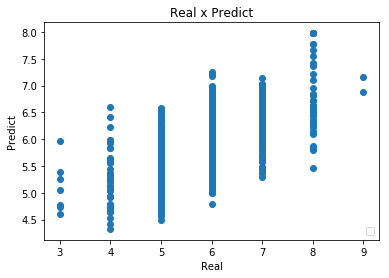

In [27]:
y_pred = model.predict(X_test)
print(model.oob_score_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
err = abs(y_test - y_pred)
plt.figure()
plt.hist(err, range=[0,25])
plt.title('Error hist')
print('Erro maximo %.2f' % (max(err)))
print('Erro mediano %.2f' %  (np.median(err)))
print('Porcentagens de erros menor que 1: %.2f ' % (len(err[err<1])/len(err)*100))
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title('Real x Predict')
plt.legend(loc="lower right")

In [28]:
print("Feature ranking:")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("feature %s \t %f" % (X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
feature alcohol 	 0.212487
feature volatile acidity 	 0.113712
feature density 	 0.096856
feature free sulfur dioxide 	 0.087100
feature sulphates 	 0.075576
feature residual sugar 	 0.073744
feature chlorides 	 0.072914
feature total sulfur dioxide 	 0.070380
feature pH 	 0.068442
feature citric acid 	 0.066402
feature fixed acidity 	 0.059189
feature type_White 	 0.001659
feature type_Red 	 0.001538


In [34]:
err_nab = y_test - y_pred
print(len(err_nab[err_nab>1])/len(err_nab))
print(len(err_nab[err_nab<-1])/len(err_nab))

0.046975546975546977
0.0444015444015444


# Escolha e análise

Foram utilizadas 6 métricas para avaliar o erro dos modelos, três comumente utilizadas na análise de modelos de regressão: Mean squared error, Mean absolute error e variance score e três mais básicas que auxiliam a avaliar o erro de acordo com o problema: erro máximo, erro mediano e porcentagem de erros menores que 1. Utilizando todas essas métricas garante se uma avaliação abrangente do modelo.

Em todas as 6 métricas o modelo Random Forest Regressor (RFR) se sobressai sobre o modelo de Regressão Linear. No modelo RFR obtemos um erro mediano de 0.29, ou seja, em metade das predições o erro não passa de 0.29. Além disso, em aprox. 91% das predições o erro é menor do que 1.